# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Alunos: 

Sérgio Strack Junior

Sabrina de Melo


Para o seguinte estudo, Utilizamos o capítulo 2.1 da AP42, pois meu empreendimento emite poluentes a partir do processo de gaseificador. 

Empreendimento: Serrana Engenharia LTDA.

Resumo do processo: A gaseificação é definida como conversão de biomassa, ou qualquer combustível sólido (material carbonáceo sólido ou líquido), em um gás energético, através da oxidação parcial à elevada temperatura 500°C – 1400°C e pressão variável (atmosférica à 33 bar) (Morrin, Lettieri et al., 2011). Durante a gaseificação, a maior parte do material de alimentação é termicamente decomposto na forma de gás, porém pequenas quantidades de subprodutos são também formadas, incluindo alcatrão, carvão e cinzas.

- Cada gaseificador trata, por dia, 45,3t de RSU e 2,5t de água contaminada e chorume. 

Utiliamos códigos para encontrar nossa tabela de dados em nosso computador.

In [40]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 2
subChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)

i:\airpolution\tabelas\FE
chp_2_2.csv
                   Processos       PM       Hg        Ni        Pb   SO2  HCl
0             Nao controlado  12.6000  0.00280  0.003930  0.107000  1.73  3.2
1                     Reator   0.1050  0.00280  0.000056  0.001500  0.00  0.0
2  Sistema de Limpeza do gas   0.0295  0.00198  0.001610  0.001450  0.00  0.0
3      Reuperacao de energia   0.0352  0.00163  0.000135  0.000458  0.00  0.0


Abaixo,, gráficos referentes ao processos de emissão do empreendimento de estudo:

*Considerando uma taxa de 45,3t de RSU por dia.

Processos    Nao controladoNao controladoNao controladoNao ...
PM                                                   578467.41
Hg                                                     417.213
Ni                                                    259.6143
Pb                                                   5001.4824
SO2                                                    78369.0
HCl                                                   144960.0
dtype: object
1
2
3
4
5
6


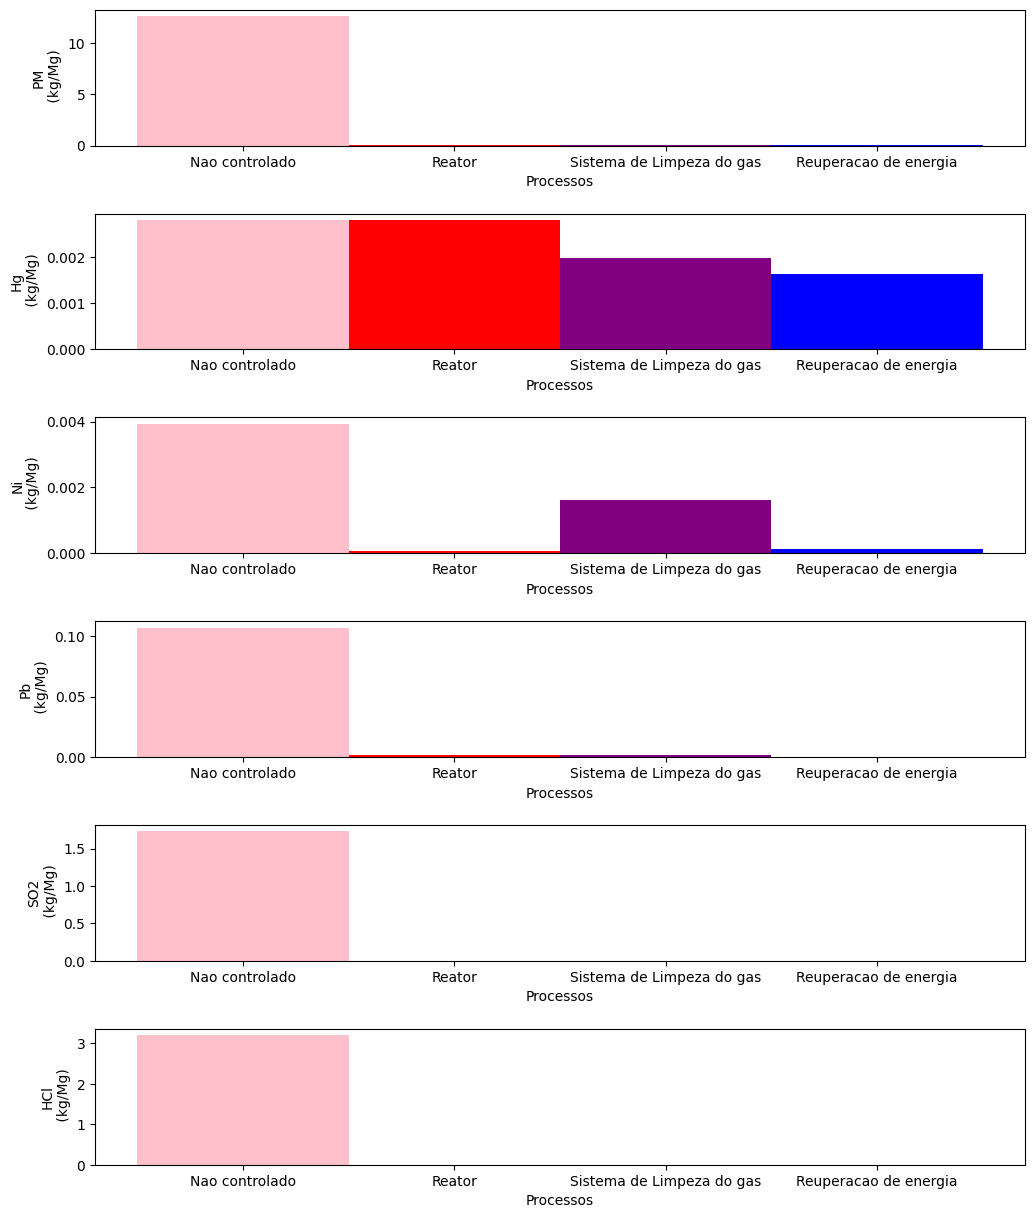

In [41]:
#plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 45300 # Kg/dia Considerando uma taxa de atividade
emis = fe*atv

#somando dataframe
print(emis.sum())
largura_barra = 1

#sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,figsize=(12, 15))

#loop para preencher o subplot com os graficos de barra com os valores da planilha
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Processos'],fe.iloc[:,ii], color=['pink', 'red','purple','blue','yellow'], width=largura_barra)
    ax[ii-1].set_xlabel('Processos', fontsize = 10)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/Mg)', fontsize = 10)
    plt.subplots_adjust(hspace=0.5)
   
fig.savefig(cwd + '\\imagens\\barplot_fatorEmiss.png')

# Os gráficos mostram no eixo Y as concentrações dos poluentes e no eixo X os processos que estão emitindo esses poluentes.
# CONCENTRAÇÃO X PROCESSOS
# Com a plotagem dos gráficos notamos: que 
# - O Processo quando não é contrlado a concentração de poluentes é alta;
# - O maior poluente é nos processos é as partículas não filtraveis (PM);
# - Mércurio é o maior poluente emitido por esse sistema de combustão de resíduos;


Criando Taxa de Atividade aleatória com sazonalidade


Nesta sessão criamos uma taxa de atividade para o empreendimento e formamos valores aleatórios em cima da máxima e minímia que o empreendimento produz, em cima da sazonalidade ao longo dos meses do ano;

Foi elaborado uma função para ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento;

Esse código retorna as emissões estimadas conforme a taxa de atividade do empreendimento;

In [42]:
import pandas as pd

def estimar_emissao(taxa_atividade, arquivo_planilha):
    # Ler a planilha de fatores de emissão
    df = pd.read_csv(arquivo_planilha)
    
   # Calcular as emissões
    emissao0 = taxa_atividade * df['PM'].sum()
    emissao1 = taxa_atividade * df['Hg'].sum()
    emissao2 = taxa_atividade * df['Ni'].sum()
    emissao3 = taxa_atividade * df['Pb'].sum()
    emissao4 = taxa_atividade * df['SO2'].sum()
    emissao4 = taxa_atividade * df['HCl'].sum()

    # Retornar uma lista de emissões
    return [emissao0, emissao1, emissao2, emissao3, emissao4]

taxa_atividade = 524.3055  #g/s  -> referente a taxa de atividade de 45.3ton/dia  
arquivo_planilha = r'I:\airpolution\tabelas\FE\chp_2_2.csv'  
emissoes_estimadas = estimar_emissao(taxa_atividade, arquivo_planilha)
print("Emissões estimadas:", emissoes_estimadas)

# Os valores gerados está mostrando as emissões estimadas para cada poluente do estudo;


Emissões estimadas: [6695.223943350001, 4.8288536550000005, 3.0047948205000004, 57.887521644, 1677.7776000000003]


[769.17341489 549.06934057 772.13813677 636.93517364 627.97620002
 375.44788343 774.02045938 265.41658511 394.79118242 490.11554835
 670.78825973 365.79826146 714.62598336 777.75680905 348.05412559
 575.33816014 266.86150087 464.8331892  285.30355997 763.7327175
 490.82604843 759.70829172 674.41809149 716.35414214 352.94236214
 301.44629366 577.12541625 350.21949565 646.66855563 476.30120032
 538.93787521 753.72815718 535.68049396 318.87687258 345.10811462
 548.00520231 537.10030322 596.4554271  472.65807603 602.84931671
 470.24864052 589.27545749 664.5080983  355.98781077 459.06813123
 525.63310834 622.17641667 395.15677659 553.00618185 589.80749085
 731.67021637 452.39776495 596.42754895 362.52726309 523.14843223
 357.80795007 743.66741125 488.55863022 697.42592381 480.66998431
 736.47626345 474.40390969 435.78810372 562.12807864 705.42455966
 713.5884138  574.47523666 306.53892927 575.30285488 390.84383395
 646.25607103 731.22461907 532.03016829 578.60438412 296.26570471
 545.316581

Text(0, 0.5, 'Valores das concentrações')

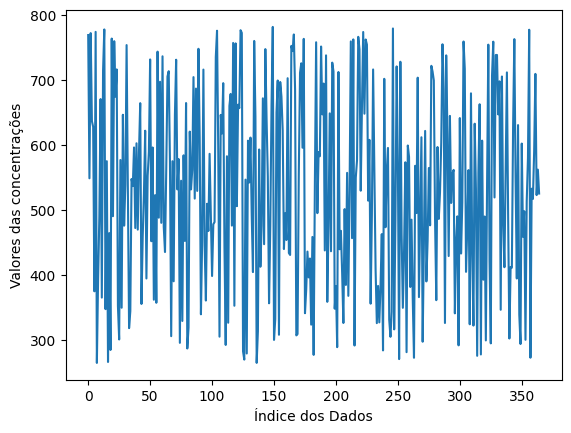

In [43]:
# Criando vetor com os valores de máxima e miníma das concentrações dos poluentes;
import numpy as np
atvMax = 786.46 #g/s 
atvMin = 262.15 #g/s
n = 365
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin #valores que representam a concentração dos poluentes;

print(atv)

# Criando uma figura com os valores
fig, ax= plt.subplots()
ax.plot(atv)
ax.set_xlabel('Índice dos Dados')
ax.set_ylabel('Valores das concentrações')

# Os valores da amtriz se dá pela a atividade em função dos valores mínimos e máximos da taxa de conentrações em g/s;
# O Gráfico irá mostrar o comportamento das concentrações geradas;

In [44]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia do Ano'] = df['Data'].dt.dayofyear

# Mostrar o DataFrame resultante
print(df)

# Código para formar uma base de dados com data para o ano todo;

          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [45]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin 
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")

# Em cima de todos os dias desse ano, estimou valores de atividade ao longo do ano nos 365 dias;

          Data  Mes  Dia do Ano   atividade
0   2024-01-01    1           1  679.732523
1   2024-01-02    1           2  737.665150
2   2024-01-03    1           3  431.324396
3   2024-01-04    1           4  641.958594
4   2024-01-05    1           5  605.445091
..         ...  ...         ...         ...
361 2024-12-27   12         362  663.379810
362 2024-12-28   12         363  543.869696
363 2024-12-29   12         364  541.717738
364 2024-12-30   12         365  660.212859
365 2024-12-31   12         366  559.010745

[366 rows x 4 columns]


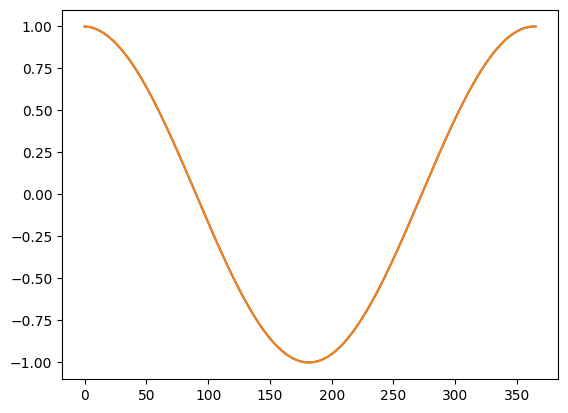

In [46]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365) # taxa de resíduo queimados por dias
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade)
df.to_csv(r"I:\airpolution\tabelas\ativ.csv")

#o gráfico mostra o comportamento da sazonalidade conforme valores gerados durante os dias do ano;

540.0799370728774


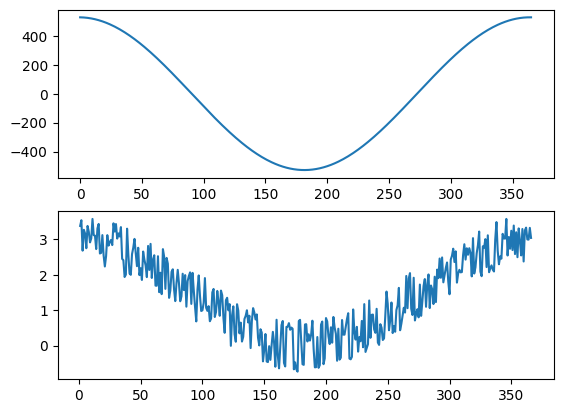

In [47]:
# Valores aleatórios com sazonalidade em base dos mínimos e máximo de atividade

df['aleatorio'] =  (atvMax - atvMin)*np.random.rand(n) + atvMin

df['aleatorioSazonal'] = (df['atividade'] +  df['sazonalidade']*df['atividade'].mean())*0.0028 # #Multiplicado por valor empírico para chegar na média que o empreendimento apresentou para um resultado mais convincente;

fig,ax= plt.subplots(2) #"(2)" significa a quantidade de gráficos

ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])
ax[0].plot(df['sazonalidade']*df['atividade'].mean())
print(df['aleatorioSazonal'].mean()*365) #Multiplicado pelos dias do ano



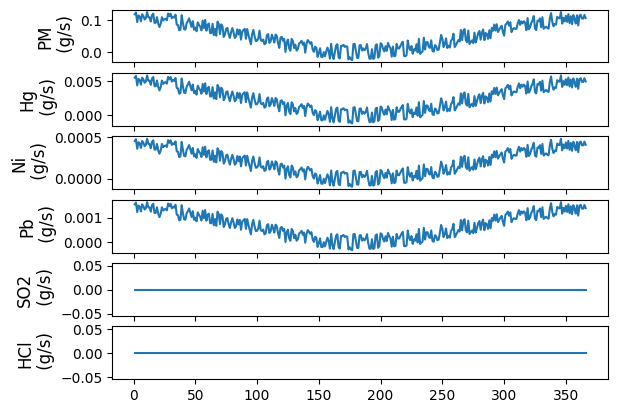

In [48]:
fig,ax= plt.subplots(6)
for ii in range (1,7):
    ax[ii-1].plot(df['Dia do Ano'], df['aleatorioSazonal']*fe.iloc[3,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (g/s)', fontsize = 12)

# Gráfico abaixo está mostrando o comportamento de cada emissão do Gaseificador do empreendimento SALUMA duarante 1 ano.
# Neste gráfico podemos ver que o pico emissão, se dá no início do ano e no final, portanto há uma maior concentração de poluentes nesses períodos sendo gerado e lançado na atmosfera.

O Código abaixo foi gerado em função de uma tentativa para gerar um gráfico contemplando a taxa de atividade e a sazonalidade de uma forma geral para facilitar o entendimento.

Traçado ainda uma linha de tendência para achar a variabilidade da taxa de atividade.

c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['sazonal_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parame

Variabilidade da taxa de atividade: 0.15677441713226029


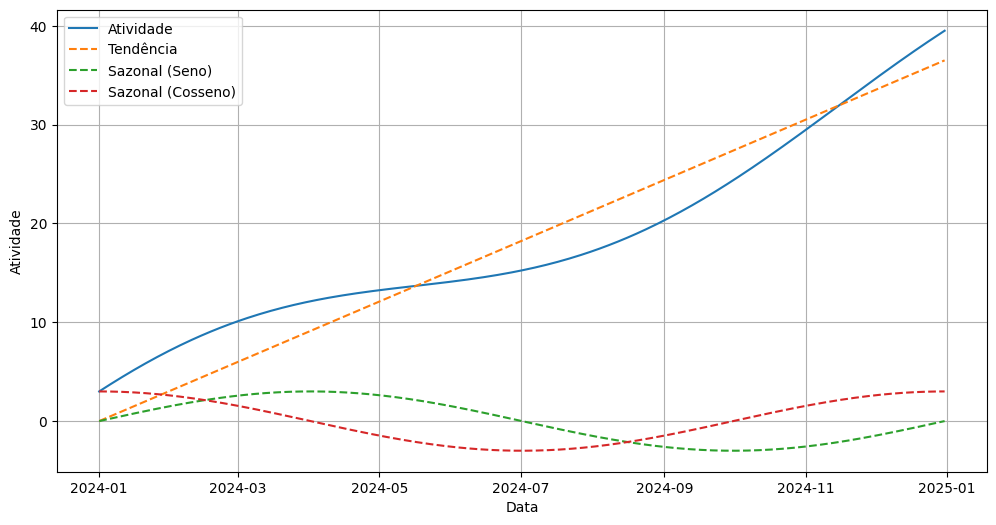

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados
np.random.seed(0)
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D') #Gera um intervalo de datas de 1 de janeiro de 2024 a 31 de dezembro de 2024, com frequência diária.
n = len(datas) #comprimento do intervalo de datas.
trend = 0.1 * np.arange(n)  # tendência linear multiplicando uma sequência numérica pelo valor 0.1.
sazonal_sin = 3 * np.sin(2 * np.pi * np.arange(n) / 365)  # componente sazonal seno / "5" valor para ajustar a amplitude
sazonal_cos = 3 * np.cos(2 * np.pi * np.arange(n) / 365)  # componente sazonal cosseno / "3" valor para ajustar a amplitude
taxa_atividade = trend + sazonal_sin + sazonal_cos #Calcula a taxa de atividade como a soma da tendência, componente sazonal senoidal, componente sazonal cosenoidal e ruído.

# A função seno (np.sin) e cosseno (np.cos) no Python retorna valores entre -1 e 1. 
#Multiplicando esses valores pelo fator 5 (para sazonal_sin) e 3 (para sazonal_cos), estamos amplificando esses valores para que a variação sazonal tenha um impacto maior na taxa de atividade.

# Criar DataFrame
data = pd.DataFrame({'Data': datas, 'Atividade': taxa_atividade}) #Cria um DataFrame com as datas e a taxa de atividade.
data.set_index('Data', inplace=True) 

# Ajustar o modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average)
model = sm.tsa.SARIMAX(data['Atividade'], order=(1, 1, 1), sazonal_order=(1, 1, 1, 12)) # Define um modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average) com uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1
results = model.fit() # Ajusta o modelo aos dados.

# Calcular a variabilidade da taxa de atividade
variability = np.std(results.resid) #Calcula o desvio padrão dos resíduos do modelo ajustado.
print("Variabilidade da taxa de atividade:", variability) 

# Plotar os resultados de dados de taxa de atividade, tendência, componente sazonal senoidal e componente sazonal cosenoidal em um gráfico.
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Atividade'], label='Atividade')
plt.plot(data.index, trend, label='Tendência', linestyle='--')
plt.plot(data.index, sazonal_sin, label='Sazonal (Seno)', linestyle='--')
plt.plot(data.index, sazonal_cos, label='Sazonal (Cosseno)', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Atividade')
plt.legend()
plt.grid(True)
plt.show()

#O objetivo desse código é:
#- Gera uma série temporal de dados de exemplo para a taxa de atividade ao longo de um ano. A série temporal é composta por uma tendência linear, uma componente sazonal senoidal e uma componente sazonal cosenoidal;
#- Um modelo SARIMA é ajustado aos dados de exemplo. O modelo SARIMA é uma extensão do modelo ARIMA (AutoRegressive Integrated Moving Average) que inclui componentes sazonais. 
#Neste caso, o modelo SARIMA tem uma ordem de diferenciação de 1, ordens ARMA de 1 e uma sazonalidade anual com ordens ARMA de 1;
#-A variabilidade da taxa de atividade é calculada como o desvio padrão dos resíduos do modelo ajustado.

Spbre o gráfico: 
- O gráfico nos apresenta um crescimento com tendência a aumentar a cada ano que passa, ou seja, como o crescimento da atividade está aumentando a tendência de poluentes emitidos na atmosfera.